# Importing libraries

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing files

In [2]:
path_fao = "FAO.csv"
path_food_prod = "Food_Production.csv"

df_fao = pd.read_csv(path_fao, encoding='latin-1')
df_food_prod = pd.read_csv(path_food_prod, encoding='latin-1')

# Combining dataframes

In [3]:
# Mapping values of 'Food product' and 'Item'
mapping = {
    'Wheat and products': 'Wheat & Rye (Bread)',
    'Rice (Milled Equivalent)': 'Rice',
    'Barley and products': 'Barley (Beer)',
    'Maize and products': 'Maize (Meal)',
    'Oats': 'Oatmeal',
    'Potatoes and products': 'Potatoes',
    'Cassava and products': 'Cassava',
    'Sugar cane': 'Cane Sugar',
    'Sugar beet': 'Beet Sugar',
    'Pulses, Other and products': 'Other Pulses',
    'Peas': 'Peas',
    'Nuts and products': 'Nuts',
    'Groundnuts (Shelled Eq)': 'Groundnuts',
    'Soyabean Oil': 'Soybean Oil',
    'Palm Oil': 'Palm Oil',
    'Sunflowerseed Oil': 'Sunflower Oil',
    'Rape and Mustard Oil': 'Rapeseed Oil',
    'Olive Oil': 'Olive Oil',
    'Tomatoes and products': 'Tomatoes',
    'Onions': 'Onions & Leeks',
    'Roots, Other': 'Root Vegetables',
    'Vegetables, Other': 'Other Vegetables',
    'Oranges, Mandarines': 'Citrus Fruit',
    'Bananas': 'Bananas',
    'Apples and products': 'Apples',
    'Grapes and products (excl wine)': 'Berries & Grapes',
    'Wine': 'Wine',
    'Fruits, Other': 'Other Fruit',
    'Coffee and products': 'Coffee',
    'Cocoa Beans and products': 'Dark Chocolate',
    'Bovine Meat': 'Beef (beef herd)',
    'Mutton & Goat Meat': 'Lamb & Mutton',
    'Pigmeat': 'Pig Meat',
    'Poultry Meat': 'Poultry Meat',
    'Milk - Excluding Butter': 'Milk',
    'Cheese': 'Cheese',
    'Eggs': 'Eggs',
    'Freshwater Fish': 'Fish (farmed)',
    'Crustaceans': 'Shrimps (farmed)'
}

# Joining the dataframes
df_fao['Food product'] = df_fao['Item'].map(mapping)
df_combined = df_fao.merge(df_food_prod, on='Food product', how='left')


# Cleaning the dataset

In [4]:
# Keeping useful features
useful_features = ['Area Abbreviation', 'Area', 'Food product', 'Element', 'Unit', 'Total_emissions', 'Y1961', 
                   'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 
                   'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 
                   'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
                   'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
                   'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
                   'Y2012', 'Y2013']
                   
df_combined = df_combined[useful_features]

# Dropping NaN values
df_combined.dropna(inplace=True)

# Calculating total production and emissions produced

In [5]:
# Calculating total production
df_combined['Total Production'] = df_combined.loc[:, 'Y1961':'Y2013'].sum(axis=1)

# Calculating total emission
df_combined['Total Emission Produced'] = df_combined['Total Production'] * df_combined['Total_emissions']

# Grouping by country

In [15]:
# Grouping by country
df_country = df_combined.groupby(['Area','Area Abbreviation', 'Element'])['Total Emission Produced'].sum().reset_index()

# Creating the proportion df
df_country_proportion = df_country.pivot_table(index=['Area','Area Abbreviation'], columns='Element', values='Total Emission Produced', fill_value=0)

# Calculating the food to feed ratio
df_country_proportion['Total'] = df_country_proportion['Food'] + df_country_proportion['Feed']
df_country_proportion['Food Proportion'] = df_country_proportion['Food'] / df_country_proportion['Total']
df_country_proportion['Feed Proportion'] = df_country_proportion['Feed'] / df_country_proportion['Total']

# Grouping by food product

In [7]:
# Grouping by food product
df_food = df_combined.groupby(['Food product', 'Element'])['Total Emission Produced'].sum().reset_index()

# Creating the proportion df
df_food_proportion = df_food.pivot_table(index='Food product', columns='Element', values='Total Emission Produced', fill_value=0)

# Calculating the food to feed ratio
df_food_proportion['Total'] = df_food_proportion['Food'] + df_food_proportion['Feed']
df_food_proportion['Food Proportion'] = df_food_proportion['Food'] / df_food_proportion['Total']
df_food_proportion['Feed Proportion'] = df_food_proportion['Feed'] / df_food_proportion['Total']


# Grouping by continent

In [18]:
# Mapping countries to continents
continent_mapping = {
    'AFG': 'Asia',
    'ALB': 'Europe',
    'DZA': 'Africa',
    'AND': 'Europe',
    'AGO': 'Africa',
    'ATG': 'North America',
    'ARG': 'South America',
    'ARM': 'Asia',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BHS': 'North America',
    'BHR': 'Asia',
    'BGD': 'Asia',
    'BRB': 'North America',
    'BLR': 'Europe',
    'BEL': 'Europe',
    'BLZ': 'North America',
    'BEN': 'Africa',
    'BTN': 'Asia',
    'BOL': 'South America',
    'BIH': 'Europe',
    'BWA': 'Africa',
    'BRA': 'South America',
    'BRN': 'Asia',
    'BGR': 'Europe',
    'BFA': 'Africa',
    'BDI': 'Africa',
    'CPV': 'Africa',
    'KHM': 'Asia',
    'CMR': 'Africa',
    'CAN': 'North America',
    'CAF': 'Africa',
    'TCD': 'Africa',
    'CHL': 'South America',
    'CHN': 'Asia',
    'COL': 'South America',
    'COM': 'Africa',
    'COG': 'Africa',
    'CRI': 'North America',
    'CIV': 'Africa',
    'HRV': 'Europe',
    'CUB': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DNK': 'Europe',
    'DJI': 'Africa',
    'DMA': 'North America',
    'DOM': 'North America',
    'TLS': 'Asia',
    'ECU': 'South America',
    'EGY': 'Africa',
    'SLV': 'North America',
    'GNQ': 'Africa',
    'ERI': 'Africa',
    'EST': 'Europe',
    'SWZ': 'Africa',
    'ETH': 'Africa',
    'FJI': 'Oceania',
    'FIN': 'Europe',
    'FRA': 'Europe',
    'GAB': 'Africa',
    'GMB': 'Africa',
    'GEO': 'Asia',
    'DEU': 'Europe',
    'GHA': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GIN': 'Africa',
    'GNB': 'Africa',
    'GUY': 'South America',
    'HTI': 'North America',
    'HND': 'North America',
    'HUN': 'Europe',
    'ISL': 'Europe',
    'IND': 'Asia',
    'IDN': 'Asia',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'IRL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JPN': 'Asia',
    'JOR': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KIR': 'Oceania',
    'PRK': 'Asia',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'KGZ': 'Asia',
    'LAO': 'Asia',
    'LVA': 'Europe',
    'LBN': 'Asia',
    'LSO': 'Africa',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LIE': 'Europe',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'MDG': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'MDV': 'Asia',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MHL': 'Oceania',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MEX': 'North America',
    'FSM': 'Oceania',
    'MDA': 'Europe',
    'MCO': 'Europe',
    'MNG': 'Asia',
    'MNE': 'Europe',
    'MAR': 'Africa',
    'MOZ': 'Africa',
    'MMR': 'Asia',
    'NAM': 'Africa',
    'NRU': 'Oceania',
    'NPL': 'Asia',
    'NLD': 'Europe',
    'NZL': 'Oceania',
    'NIC': 'North America',
    'NER': 'Africa',
    'NGA': 'Africa',
    'MKD': 'Europe',
    'NOR': 'Europe',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PLW': 'Oceania',
    'PAN': 'North America',
    'PNG': 'Oceania',
    'PRY': 'South America',
    'PER': 'South America',
    'PHL': 'Asia',
    'POL': 'Europe',
    'PRT': 'Europe',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'KNA': 'North America',
    'LCA': 'North America',
    'VCT': 'North America',
    'WSM': 'Oceania',
    'SMR': 'Europe',
    'STP': 'Africa',
    'SAU': 'Asia',
    'SEN': 'Africa',
    'SRB': 'Europe',
    'SYC': 'Africa',
    'SLE': 'Africa',
    'SGP': 'Asia',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SLB': 'Oceania',
    'SOM': 'Africa',
    'ZAF': 'Africa',
    'SSD': 'Africa',
    'ESP': 'Europe',
    'LKA': 'Asia',
    'SDN': 'Africa',
    'SUR': 'South America',
    'SWE': 'Europe',
    'CHE': 'Europe',
    'SYR': 'Asia',
    'TJK': 'Asia',
    'TZA': 'Africa',
    'THA': 'Asia',
    'TGO': 'Africa',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Asia',
    'TKM': 'Asia',
    'TUV': 'Oceania',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'ARE': 'Asia',
    'GBR': 'Europe',
    'USA': 'North America',
    'URY': 'South America',
    'UZB': 'Asia',
    'VUT': 'Oceania',
    'VEN': 'South America',
    'VNM': 'Asia',
    'YEM': 'Asia',
    'ZMB': 'Africa',
    'ZWE': 'Africa',
}

# Grouping by continent

df_country['Continent'] = df_country['Area Abbreviation'].map(continent_mapping)
df_continent = df_country.groupby('Continent').sum()

df_continent_pivot = df_country.pivot_table(index='Continent',columns='Element', values='Total Emission Produced', aggfunc='sum')

df_continent_pivot['Feed Ratio'] = df_continent_pivot['Feed']/df_continent_pivot['Feed'].sum()
df_continent_pivot['Food Ratio'] = df_continent_pivot['Food']/df_continent_pivot['Food'].sum()

# Calculating emission produced per year

In [19]:
# Calculating emission produced
df_emission = df_combined.iloc[:, 6:-2].multiply(df_combined['Total_emissions'], axis=0)

# Calculating yearly emission
yearly_totals = df_emission.sum()


# Plots

## Food to feed proportion per country

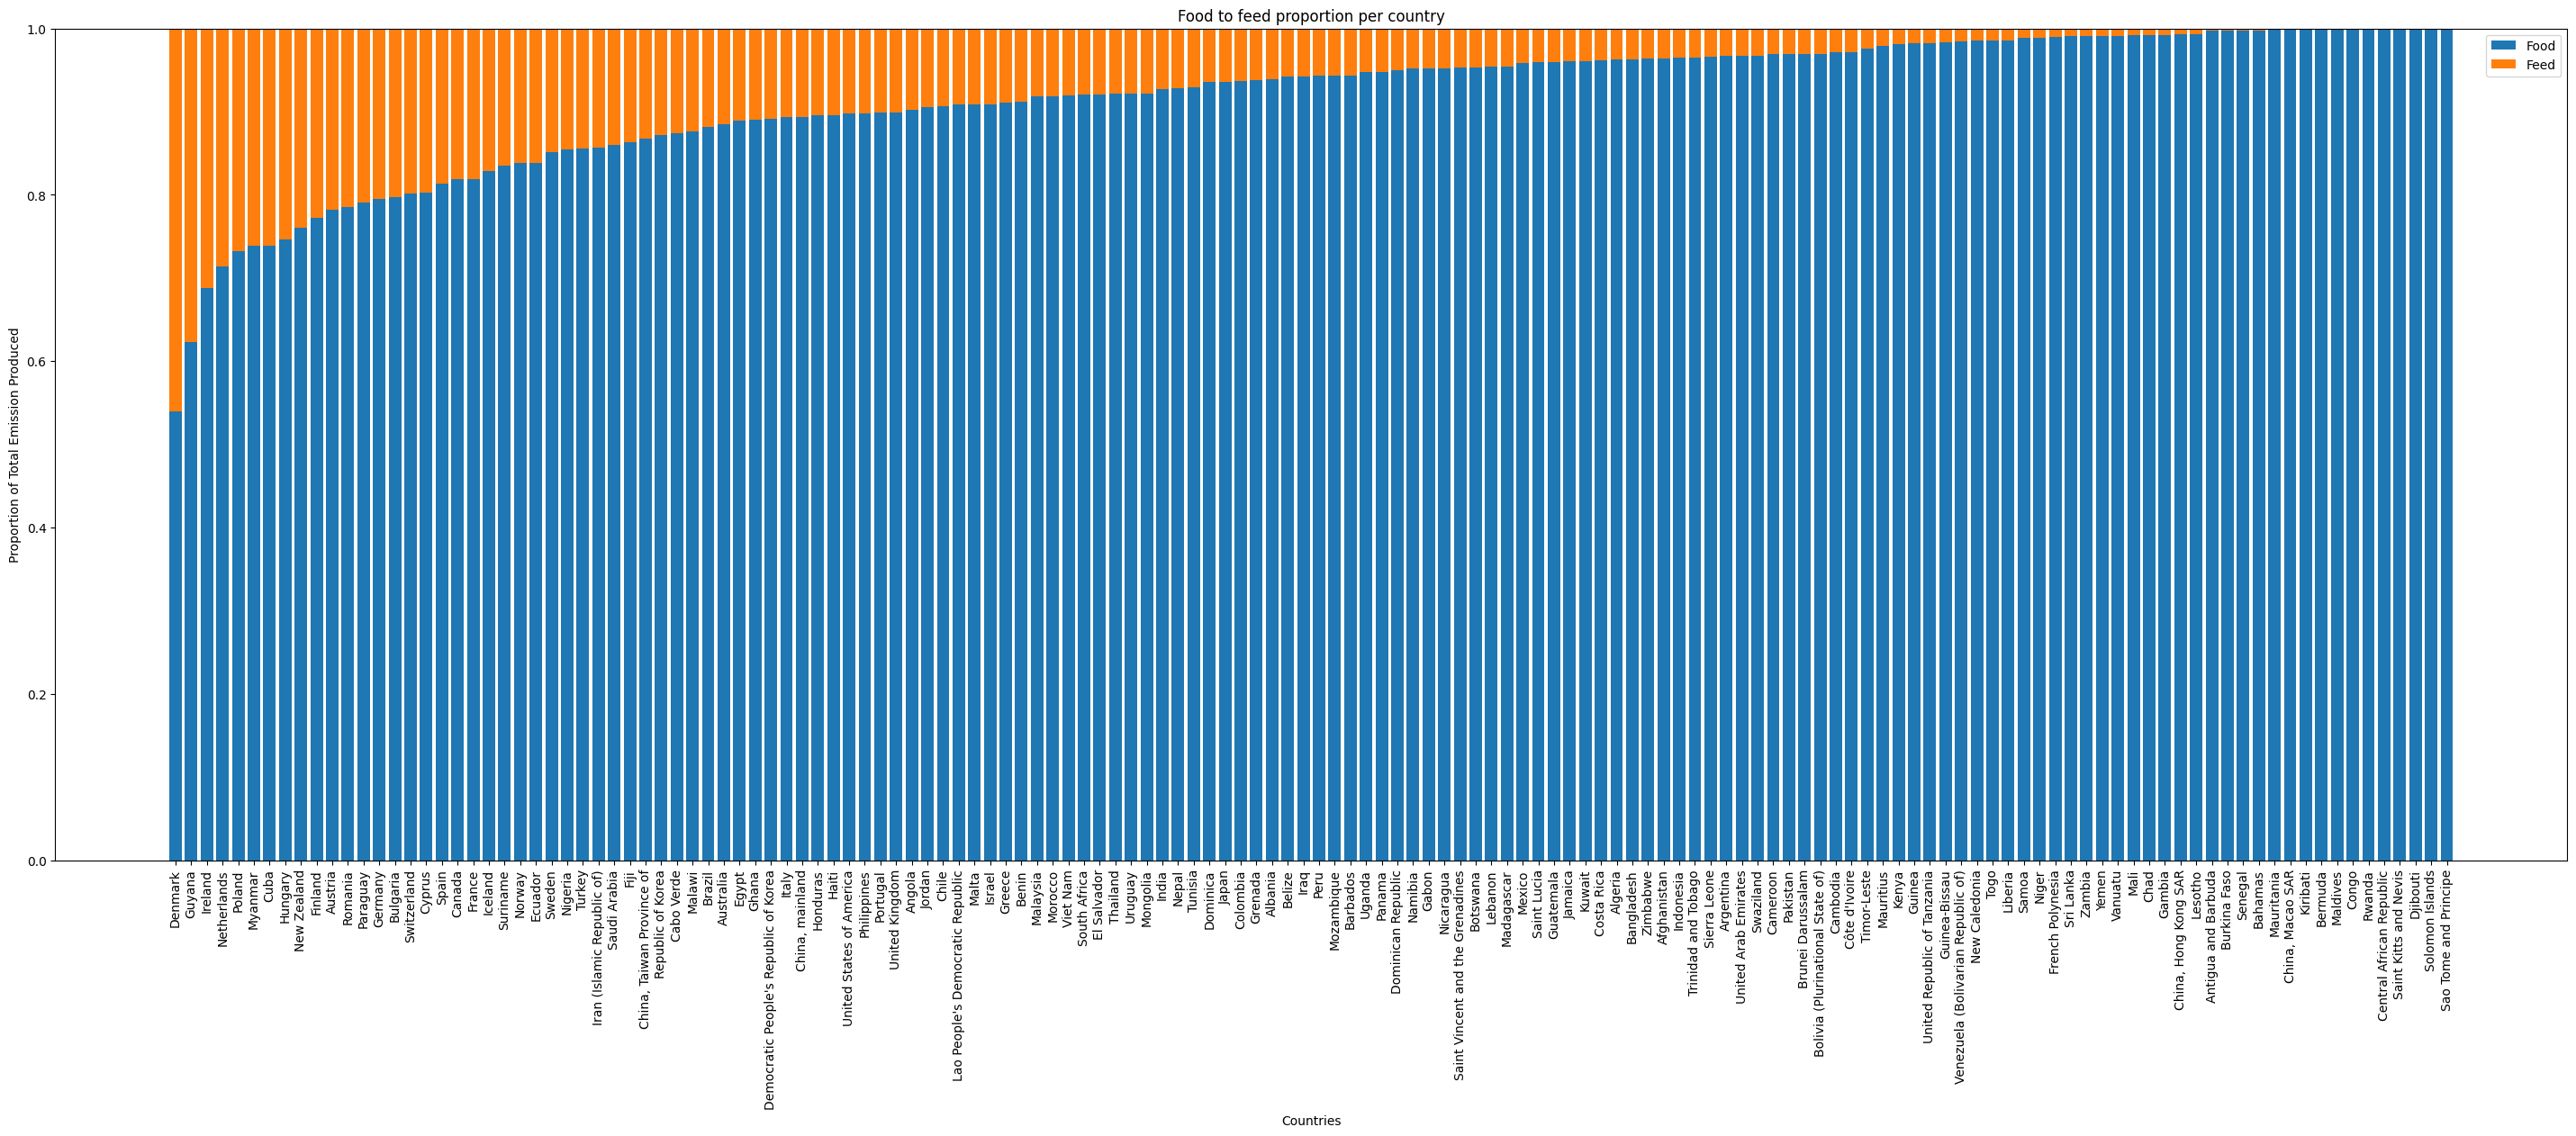

In [20]:
plt.figure(figsize=(36, 12))

# Sorting by descending feed proportion
df_country_proportion_sorted = df_country_proportion.sort_values('Feed Proportion', ascending=False)

# Extract the first element of each tuple in the index
index_first_elements = [index_tuple[0] for index_tuple in df_country_proportion_sorted.index]

# Plotting the bars
plt.bar(index_first_elements, df_country_proportion_sorted['Food Proportion'], label='Food')
plt.bar(index_first_elements, df_country_proportion_sorted['Feed Proportion'], bottom=df_country_proportion_sorted['Food Proportion'], label='Feed')

# Customize the chart
plt.title('Food to feed proportion per country')
plt.xlabel('Countries')
plt.ylabel('Proportion of Total Emission Produced')
plt.xticks(rotation=90)
plt.legend()

plt.show()

## Food to feed proportion per continent

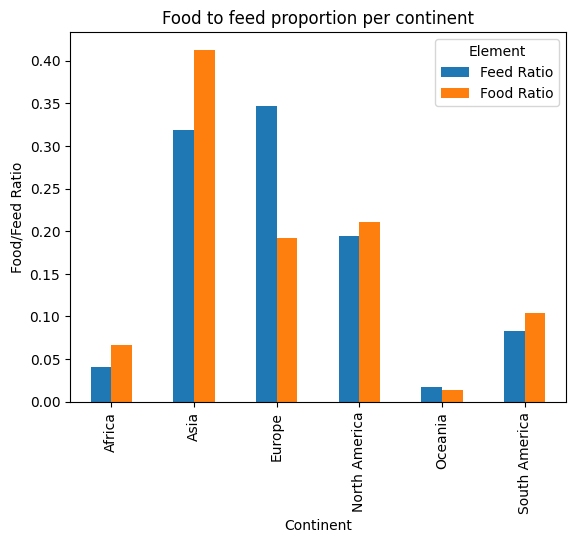

In [22]:
df_continent_pivot[['Feed Ratio','Food Ratio']].plot(kind='bar')
plt.title('Food to feed proportion per continent')
plt.xlabel('Continent')
plt.ylabel('Food/Feed Ratio')
plt.show()

## CO2 total emissions per continent

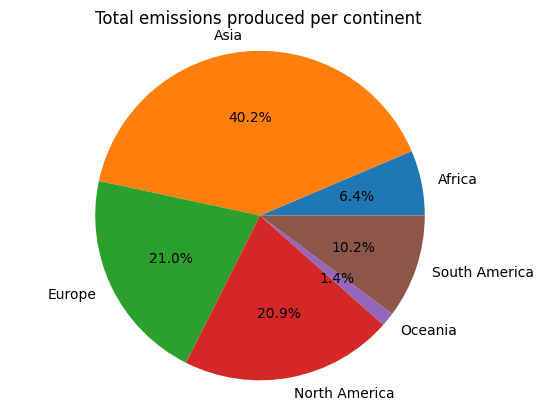

In [24]:
plt.pie(df_continent['Total Emission Produced'],labels=df_continent.index, autopct='%1.1f%%')
plt.title('Total emissions produced per continent')
plt.axis('equal')
plt.show()

# Food to feed production per food product

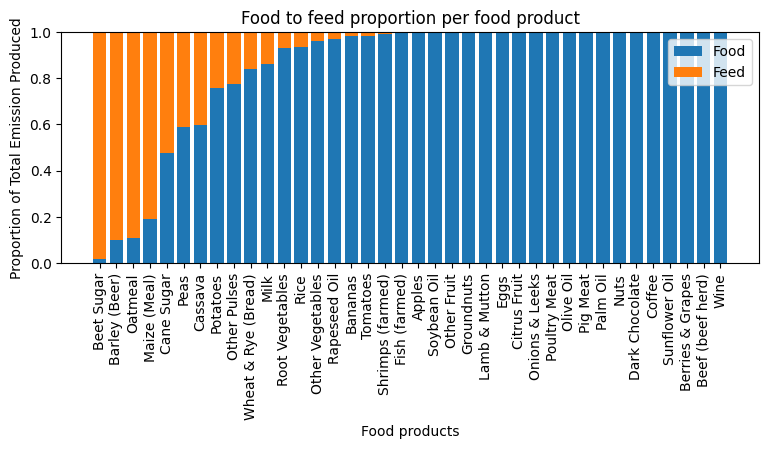

In [16]:
plt.figure(figsize=(9, 3))

# Sorting by descending feed proportion
df_food_proportion_sorted = df_food_proportion.sort_values('Feed Proportion', ascending=False)

# Plotting the bars
plt.bar(df_food_proportion_sorted.index, df_food_proportion_sorted['Food Proportion'], label='Food')
plt.bar(df_food_proportion_sorted.index, df_food_proportion_sorted['Feed Proportion'], bottom=df_food_proportion_sorted['Food Proportion'], label='Feed')

# Customize the chart
plt.title('Food to feed proportion per food product')
plt.xlabel('Food products')
plt.ylabel('Proportion of Total Emission Produced')
plt.xticks(rotation=90)
plt.legend()

plt.show()

## Yearly emission trend

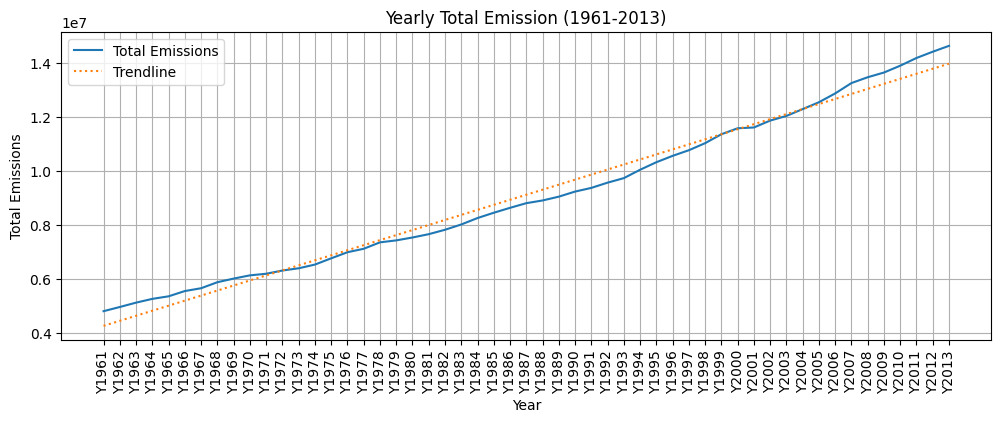

In [14]:
# Obtain year from string values
x = np.array([int(i[1:]) for i in yearly_totals.index])

# Fitting linear regression model
y = yearly_totals.values
slope, intercept = np.polyfit(x, y, 1)
trendline_values = (slope * x) + intercept

# Plotting the trend
plt.figure(figsize=(12, 4))
plt.plot(yearly_totals.index, yearly_totals.values, label='Total Emissions')
plt.plot(yearly_totals.index, trendline_values, linestyle='dotted', label='Trendline')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Yearly Total Emission (1961-2013)')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()
